<a href="https://colab.research.google.com/github/ejguenther/icesat2_topobathy/blob/main/Decision_trees_Assignment03_Raster%26Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UT-GEOML/GEO398D/blob/main/03-Decision_trees.ipynb)

# Decision Trees, Random Forests, and Gradient Boosting

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests and Gradient Boosting methods, which are among the most powerful algorithms available today for structured/tabular data.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

In [58]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
df['species'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [64]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:] # restrict dataset to petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Decision trees require very little data preparation. They don't require feature scaling or centering at all.

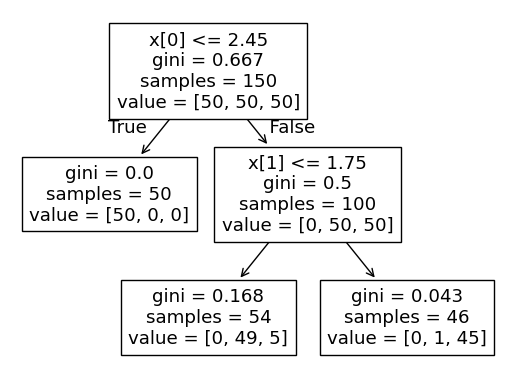

In [65]:
from sklearn import tree
tree.plot_tree(tree_clf);

A node's `samples` attribute counts how many training instances it applies to.

A nodes' `value` tells you how many training instances of each class this node applies to: for example, the bottom right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.

A nodes's `gini` attribute meaures its impurity: a node is "pure" if all training instances in it belong to the same class. It is computed as follows:

$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 $,

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

For example, the depth-2 left node has a `gini` score equal to $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$.

Scikit-Learn uses the **Classification and Regression Tree (CART)** algorithm to train Decision Trees. It works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$. To choose $k$ and $t_k$, it searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function that needs to be minimized looks like this:

$ J(k, t_k)  = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops once it reaches the maximum depth or if it cannot find a split that will reduce impurity.

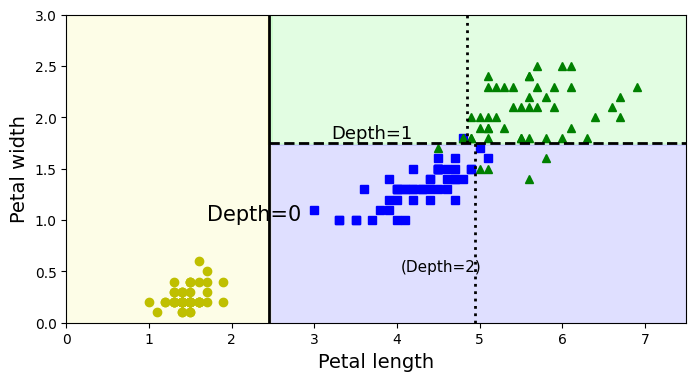

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

fig = plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.70, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13);
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11);

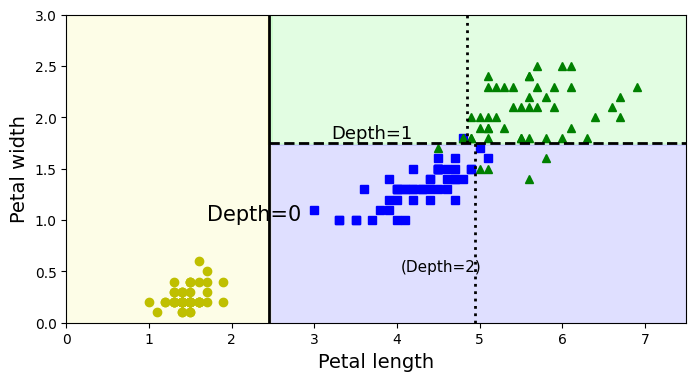

In [67]:
fig

Decision Trees are intuitive, and their decisions are easy to interpret (**white box models**). In contrast, Random Forests or neural networks are generally considered **black box models**; it is usually hard to explain why the predictions were made. Decision Trees provide simple classification rules that can even be applied manually if need be.

Decision Trees make very few assumptions about the training data; if left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely; most likely overfitting it. To avoid overfitting, we need to restrict the tree's freedom during training (regularization). The most obvious way to do this with Decision Trees is to restrict the maximum depth of the tree (the `max_depth` hyperparameter). Other parameters that restrict the shape of the tree: `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `max_features`. Increasing `min_*` or reducing `max_*` parameters will regularize the model.

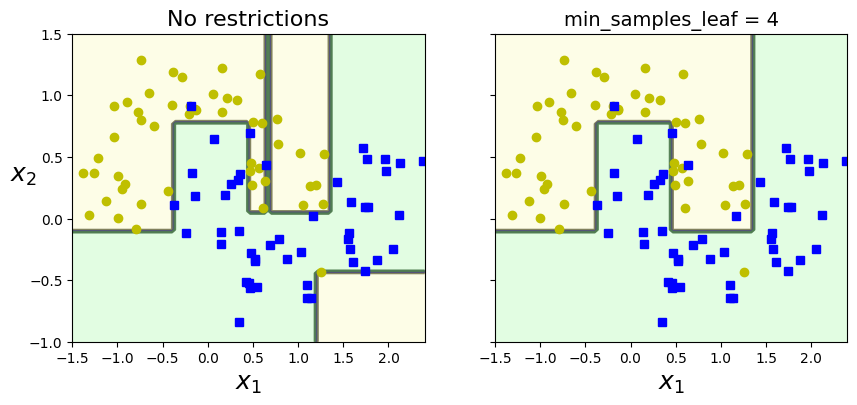

In [68]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53) # create synthetic data

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("");

## Predicting classes and class probabilities

A Decision tree can estimate the probability that an instance belongs to a particular class $k$. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances in this node. For example, if you found a flower whose petals are 5 cm long and 1.5 cm wide, the corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54).

In [69]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [70]:
tree_clf.predict([[5, 1.5]])

array([1])

## Sensitivity to training set details

Decision Trees are simple to understand and interpret, easy to use, versatile, and powerful; but they do have a few limitations. First, Decision Trees rely on orthogonal decision boundaries, and this makes them sensitive to training set rotation.

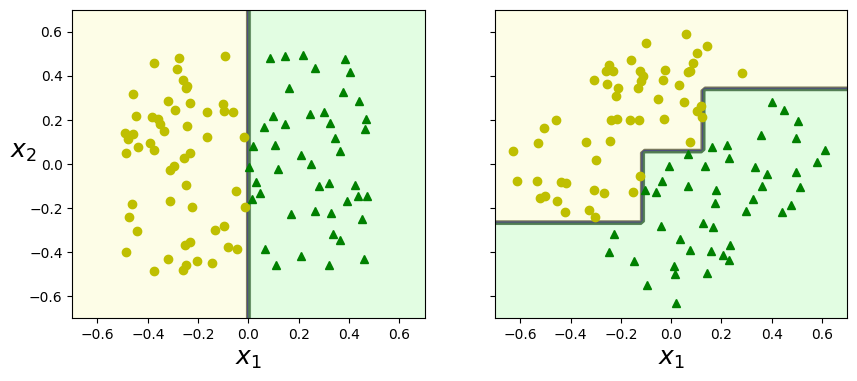

In [71]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("");

More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data. In fact, since the training algorithm used by Scikit-Learn is stochastic, you may get very different models even on the same training data.

# Regression trees

Decision Trees are also capable of performing regression tasks. The CART algorithm works the same way, except instead of minimizing impurity, it minimizes the MSE (mean squared error). Let's build a regression tree using Scikit-Learn's `DecisionTreeRegressor` class:

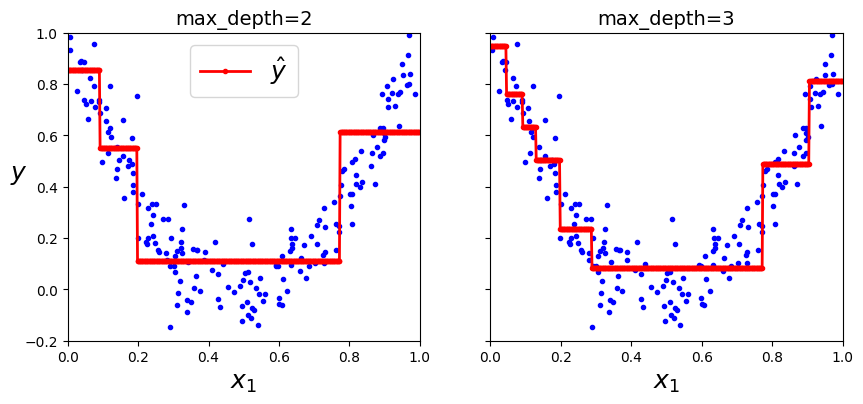

In [72]:
from sklearn.tree import DecisionTreeRegressor

# Quadratic training set + noise
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5) ** 2 + np.random.randn(m, 1) / 10

# Train regression trees with different depths
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg1.fit(X_reg, y_reg)
tree_reg2.fit(X_reg, y_reg)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X_reg, y_reg)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X_reg, y_reg, ylabel=None)
plt.title("max_depth=3", fontsize=14);

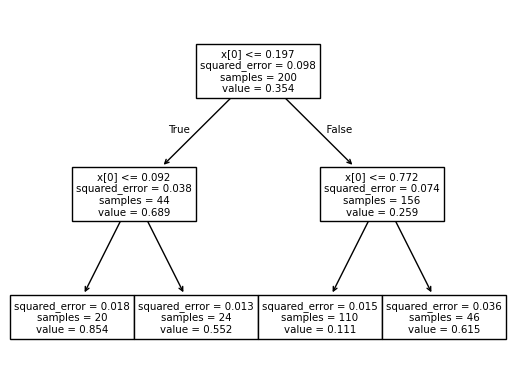

In [73]:
tree.plot_tree(tree_reg1);

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE (mean squared error).

Just like with classification tasks, Decision Trees are prone to overfitting.

# Ensemble Learning | Random Forests

* ask many people a complex question and aggregate their answers - the **wisdom of the crowds**
* aggregate the predictions of a group of predictors (classifiers or regressors) --> better predictions than the best individual predictor
* a group of predictors is called an **ensemble**; the technique is called **ensemble learning**
* e.g., you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the indivisual trees, then predict the class that gets the most votes --> **Random Forest**
* the winning solutions in ML competitions often involve ensemble methods

## Voting classifiers

One approach to ensemble learning is to train several different algorithms and aggregate their predictions. The class that gets the most votes wins (**hard voting**). This works best when the predictors are as independent from one another as possible.

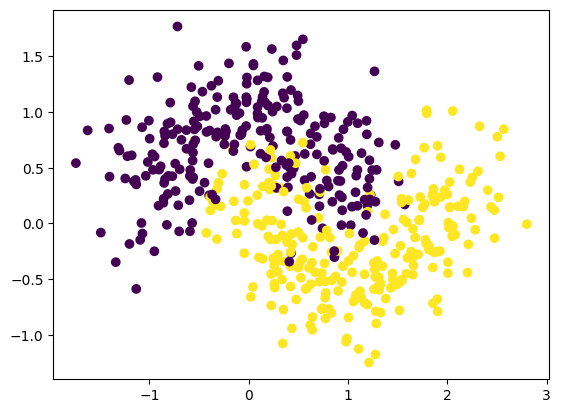

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y);

In [75]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


In [76]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

## Bagging

Another approach to get different classifiers is to to train the same algorithm (e.g., Decision Tree) on different subsets of the training data. When sampling is performed with replacement, this method is called **bagging** (= bootstrap aggregating). Sampling without replacement is called **pasting**.

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [79]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


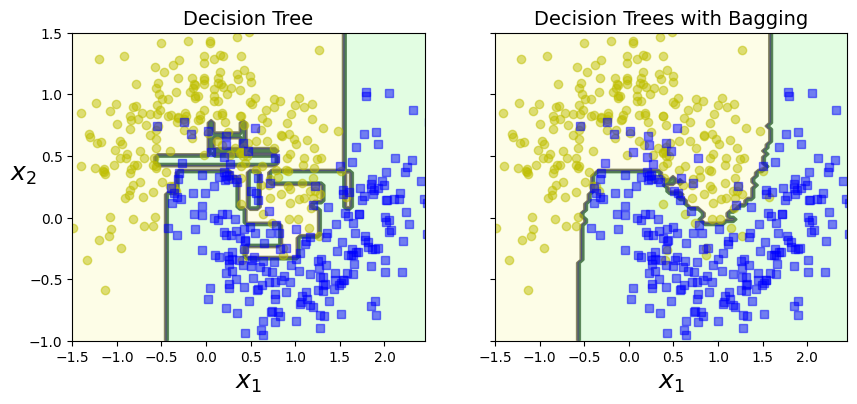

In [80]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("");

## Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with `max_samples` set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class.

In [81]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.912


### Feature importance
Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average. You can access this result using the `feature_importances_` variable.

In [82]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


### Cross-validation for more robust evaluation

A single train/test split can give misleading results depending on how the data happens to be split. **Cross-validation** provides a more robust estimate by training and evaluating the model multiple times on different splits:

In [83]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_cv, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

Cross-validation scores: [0.88 0.9  0.93 0.88 0.88]
Mean accuracy: 0.894 (+/- 0.039)


## Gradient Boosting

While Random Forests train many trees **in parallel** (bagging), **Gradient Boosting** trains trees **sequentially**: each new tree tries to correct the errors made by the previous trees. This often leads to better performance, especially on structured/tabular data.

Key differences:
- **Bagging (Random Forest)**: Trees are independent, trained on random subsets, predictions are averaged
- **Boosting**: Trees are dependent, each one learns from the mistakes of the ensemble so far

Popular gradient boosting libraries include **XGBoost**, **LightGBM**, and **CatBoost**. These are often the winning algorithms in ML competitions involving tabular data. XGBoost in particular has become the go-to algorithm for structured data problems due to its speed, regularization options, and ability to handle missing values.

Let's compare Random Forest with XGBoost on the [Forest Covertype](https://archive.ics.uci.edu/dataset/31/covertype) dataset:

In [84]:
!pip install xgboost

In [85]:
from xgboost import XGBClassifier
from sklearn.datasets import fetch_covtype

# Load the forest covertype dataset (a classic dataset where gradient boosting excels)
covtype = fetch_covtype()

# Use stratified sampling to get a representative subset of 10,000 samples
X_subset, _, y_subset, _ = train_test_split(
    covtype.data, covtype.target, train_size=10000, stratify=covtype.target, random_state=42
)

# Convert labels from 1-7 to 0-6 (XGBoost expects 0-indexed class labels)
y_subset = y_subset - 1

X_train_cov, X_test_cov, y_train_cov, y_test_cov = train_test_split(
    X_subset, y_subset, test_size=0.2, stratify=y_subset, random_state=42
)

# Train both classifiers
rf_cov = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb_cov = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=9, random_state=42, n_jobs=-1)

rf_cov.fit(X_train_cov, y_train_cov)
xgb_cov.fit(X_train_cov, y_train_cov)

print("Forest Covertype dataset (10,000 samples, 54 features, 7 classes)")
print("Random Forest accuracy: ", accuracy_score(y_test_cov, rf_cov.predict(X_test_cov)))
print("XGBoost accuracy:       ", accuracy_score(y_test_cov, xgb_cov.predict(X_test_cov)))

Forest Covertype dataset (10,000 samples, 54 features, 7 classes)
Random Forest accuracy:  0.807
XGBoost accuracy:        0.812


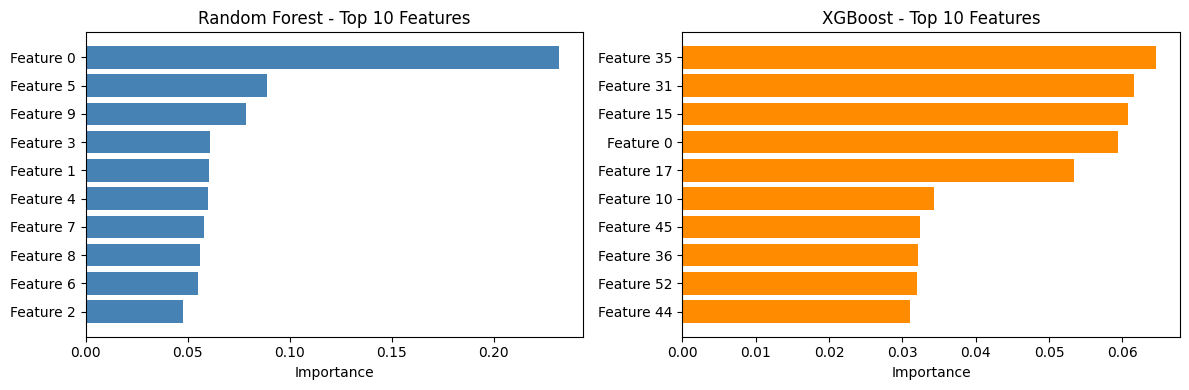

In [86]:
# Compare feature importances between the two methods
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Get top 10 feature indices by importance for each model
rf_top10_idx = np.argsort(rf_cov.feature_importances_)[-10:]
xgb_top10_idx = np.argsort(xgb_cov.feature_importances_)[-10:]

# Random Forest feature importances
axes[0].barh(range(10), rf_cov.feature_importances_[rf_top10_idx], color='steelblue')
axes[0].set_yticks(range(10))
axes[0].set_yticklabels([f'Feature {i}' for i in rf_top10_idx])
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest - Top 10 Features')

# XGBoost feature importances
axes[1].barh(range(10), xgb_cov.feature_importances_[xgb_top10_idx], color='darkorange')
axes[1].set_yticks(range(10))
axes[1].set_yticklabels([f'Feature {i}' for i in xgb_top10_idx])
axes[1].set_xlabel('Importance')
axes[1].set_title('XGBoost - Top 10 Features')

plt.tight_layout()
plt.show()

## When to use what?

| Algorithm | Best for | Pros | Cons |
|-----------|----------|------|------|
| **Decision Tree** | Simple problems, interpretability | Easy to understand, fast | Prone to overfitting |
| **Random Forest** | General-purpose, when interpretability matters less | Robust, handles overfitting well, parallelizable | Can be slow with many trees |
| **Gradient Boosting** | Kaggle competitions, maximizing accuracy on tabular data | Often best accuracy, handles complex patterns | Slower to train, more hyperparameters to tune |
| **Neural Networks** | Images, text, audio, very large datasets | State-of-the-art for unstructured data | Need lots of data, less interpretable |

For most **tabular/structured data** problems, gradient boosting methods (XGBoost, LightGBM) are the go-to choice. For **images, text, and audio**, neural networks are typically better.

# Classifying ice-wedge polygons by shape

[Ice-wedge](https://en.wikipedia.org/wiki/Ice_wedge) polygons are common features in lowland areas with permafrost; they form due to thermal contraction of the soil during the cold winter months. In most places they are roughly hexagonal in shape, but in some circumstances,e.g., when they form on point bars, they are rectangular. In this next section, we will work on building a random forest classifier to distinguish rectangular polygons from non-rectangular ones.

A large number of these polygons have been interpreted, using a deep learning approach that we will see later in class. For now, we will load the data and try to classify the polygons.

The polygons are stored as shapefiles (.shp extension) and we can use the [geopandas](https://geopandas.org/en/stable/about.html) package to read and manipulate them. Geopandas is a combination of [pandas](https://pandas.pydata.org/) and [shapely](https://shapely.readthedocs.io/en/stable/manual.html).

The typical ice-wedge polygons tend to be hexagonal (or have 5-7 vertices), with no preferred orientation.

<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons_1.png">

Ice-wedge polygons that formed on point bars of meandering rivers tend to be rectangular, with an orientation that seems to conform to the growth history of the point bar. The network in this image was extracted using a convolutional neural network called Unet.

<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons_2.png">

Let's download the data using 'wget' and then unzip the zip-file.

In [87]:
# use this with Google Colab:

!wget https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons.zip

--2026-02-16 18:34:32--  https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10575302 (10M) [application/zip]
Saving to: ‘ice_wedge_polygons.zip’

ice_wedge_polygons. 100%[===================>]  10.08M  --.-KB/s    in 0.1s    

2026-02-16 18:34:32 (94.0 MB/s) - ‘ice_wedge_polygons.zip’ saved [10575302/10575302]



In [88]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d1a5a384b27f322f0e37a73c631427ebc7f99a3b68f5a509f56b0da8cdd39ea2
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [89]:
# use this with local notebook:

import wget
downloaded_file = wget.download('https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons.zip')

In [90]:
!unzip ice_wedge_polygons.zip

Archive:  ice_wedge_polygons.zip
  inflating: ice_wedge_polygons.shx  
  inflating: __MACOSX/._ice_wedge_polygons.shx  
  inflating: ice_wedge_polygons.cpg  
  inflating: __MACOSX/._ice_wedge_polygons.cpg  
  inflating: ice_wedge_polygons.dbf  
  inflating: __MACOSX/._ice_wedge_polygons.dbf  
  inflating: ice_wedge_polygons.prj  
  inflating: __MACOSX/._ice_wedge_polygons.prj  
  inflating: ice_wedge_polygons.shp  
  inflating: __MACOSX/._ice_wedge_polygons.shp  


In [91]:
import geopandas
polys = geopandas.read_file('ice_wedge_polygons.shp')
polys.head()

,area,geometry
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299...."
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372...."
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413...."
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046...."
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996...."


Let's look at a subset of the data. We will use the polygons on the left (western) side of this map as examples of the 'normal' ice-wedge polygons and the polygons on the right (eastern) side of this map as examples of the rectangular ice-wedge polygons.

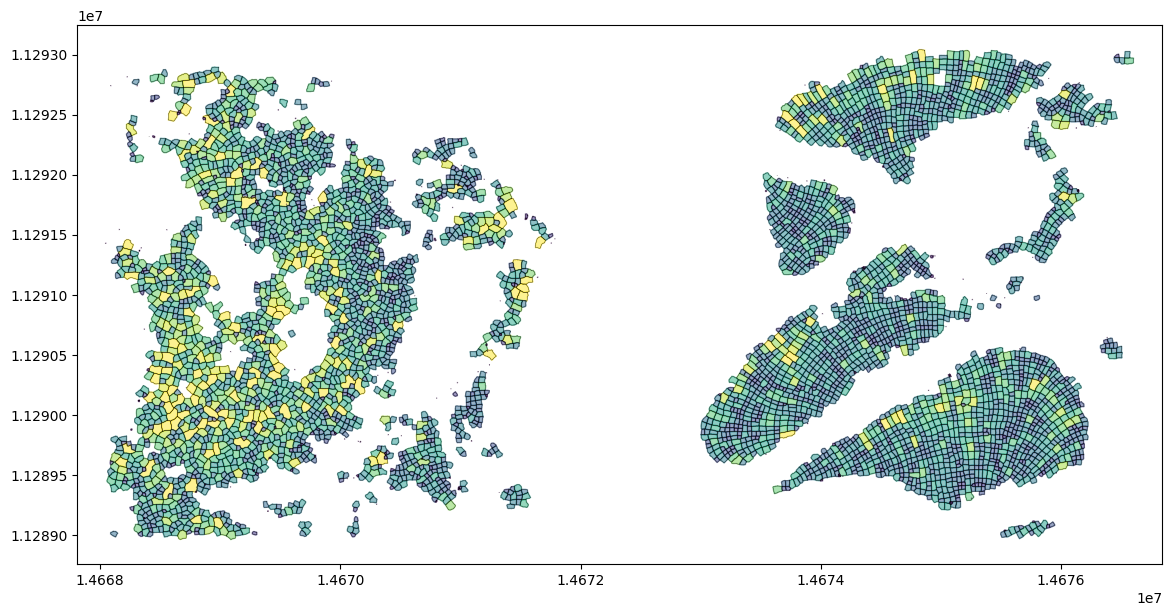

In [92]:
import matplotlib.colors as mcolors
colormap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=5000)

plt.figure(figsize = (14, 7))
for poly in polys['geometry']:
    if poly.centroid.y > 11289000 and poly.centroid.y < 11293000:
        # color polygons by area:
        plt.fill(poly.exterior.xy[0], poly.exterior.xy[1], linewidth=None, color=colormap(norm(poly.area)), alpha=0.5)
        plt.plot(poly.exterior.xy[0], poly.exterior.xy[1], linewidth=0.25, color='k')
plt.axis('equal');

Let's add a new column to the dataframe: one that defines the polygon type. This can be either 'normal', 'rectangular', or 'unknown'. Our goal is to build a model that then can be used to determine the polygon type for the 'unknown' category.

In [93]:
count = 0
for poly in polys['geometry']:
    if poly.centroid.x > 14672400 and poly.centroid.y > 11285500 and poly.centroid.y < 11293500:
        polys.loc[count, 'type'] = 'rectangular'
    elif poly.centroid.x < 14672400 and poly.centroid.y > 11285500 and poly.centroid.y < 11293500:
        polys.loc[count, 'type'] = 'normal'
    else:
        polys.loc[count, 'type'] = 'unknown'
    count += 1

polys.head()

,area,geometry,type
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299....",unknown
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372....",unknown
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413....",unknown
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046....",unknown
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996....",unknown


The 'target' column in this dataframe is the 'type' column. However, we only have one potential 'feature' that can be used in the classification: the 'area' column. We cannot use the 'geometry' column as a feature, as the classifier will not accept a shapely Polygon object as input.

So we need to add new feature columns to the dataframe: attributes of the polygons that we think will be useful when trying to distinguish 'normal' polygons from 'meander' polygons. This process is called 'feature engineering' and is an important part of conventional machine learning that relies on structured, tabular data. The advantage of deep neural networks is that they take care of feature engineering themselves, under the hood, and there is no need for us to deal with it. That said, neural networks still underperform more conventional ML methods when it comes to tabular data with useful features.

To engineer some new features, we need ideas for features that are potentially useful for distinguishing rectangular shape from the rest. Two obvious candidates are the **number of vertices** and the **aspect ratio**.

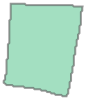

In [94]:
poly = polys.iloc[1000].geometry
poly

In [95]:
len(poly.exterior.coords.xy[0])-1 # many points in the polygon; their number has nothing to do with the number of vertices

216

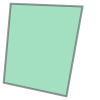

In [96]:
poly.simplify(3) # simplified polygon has only a small number of coordinates

In [97]:
len(poly.simplify(3).exterior.coords.xy[0])-1 # number of vertices equals the number of x-coordinates minus 1

4

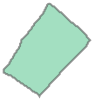

In [98]:
poly = polys.iloc[2100].geometry
poly

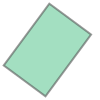

In [99]:
poly.minimum_rotated_rectangle # we can use this method to get the aspect ratio

In [100]:
# function for computing the aspect ratio

from shapely.geometry import Polygon

def calculate_aspect_ratio(rectangle):
    if not isinstance(rectangle, Polygon):
        raise ValueError("Input must be a Shapely Polygon")

    # Ensure the polygon is a rectangle (has 4 sides plus closing point)
    if len(rectangle.exterior.coords) != 5:
        raise ValueError("Polygon is not a rectangle")

    # Get the coordinates of the rectangle
    coords = list(rectangle.exterior.coords)

    # Calculate lengths of two adjacent sides
    width = np.linalg.norm(np.array(coords[0]) - np.array(coords[1]))
    height = np.linalg.norm(np.array(coords[1]) - np.array(coords[2]))

    # Calculate and return the aspect ratio
    if width < height:
        aspect_ratio = width / height
    else:
        aspect_ratio = height / width
    return aspect_ratio

In [101]:
import numpy as np
import warnings

# use the tricks described above to add features to the dataframe:

for i in range(len(polys)):
    poly = polys.loc[i, 'geometry'].simplify(3)
    polys.loc[i, 'n_vertices'] = len(poly.exterior.coords.xy[0])-1
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # we need this so that some annoying warnings are ignored
        polys.loc[i, 'aspect ratio'] = calculate_aspect_ratio(poly.minimum_rotated_rectangle)

polys.head()

,area,geometry,type,n_vertices,aspect ratio
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299....",unknown,6.0,0.901733
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372....",unknown,8.0,0.696075
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413....",unknown,5.0,0.942641
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046....",unknown,5.0,0.662839
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996....",unknown,6.0,0.754288


In [102]:
# create dataframe with training data

polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head()

,area,geometry,type,n_vertices,aspect ratio
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155
606,1649.581441,"POLYGON ((14675842.628 11293524.801, 14675842....",rectangular,6.0,0.622074
607,3112.015955,"POLYGON ((14675399.876 11293510.551, 14675399....",rectangular,7.0,0.985807


In [103]:
# build and train model; make predictions

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6517450682852808


In [104]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['normal', 'rectangular']))

Classification Report:
              precision    recall  f1-score   support

      normal       0.59      0.57      0.58      1107
 rectangular       0.69      0.71      0.70      1529

    accuracy                           0.65      2636
   macro avg       0.64      0.64      0.64      2636
weighted avg       0.65      0.65      0.65      2636



Let's visualize the confusion matrix to see what types of errors the model is making:

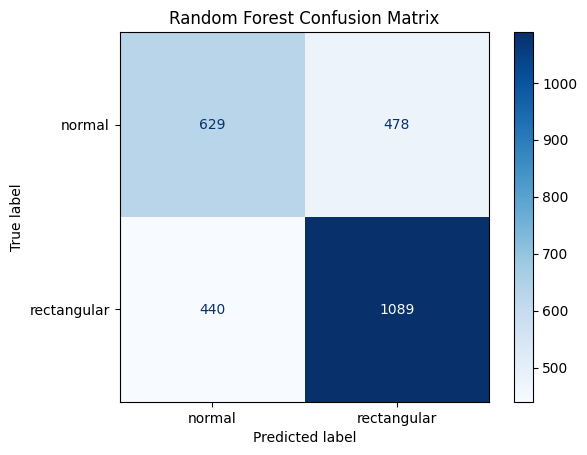

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['normal', 'rectangular'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'rectangular'])
disp.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

We can look at which are the more important features:

In [106]:
feature_list = ['area', 'n_vertices', 'aspect ratio']
for name, score in zip(feature_list, rf.feature_importances_):
    print("{:12s}".format(name), "{:10.3f}".format(score))

area              0.434
n_vertices        0.162
aspect ratio      0.404


Let's compare the Random Forest with Gradient Boosting on this classification task:

In [107]:
from sklearn.preprocessing import LabelEncoder

# Encode string labels to numeric values for XGBoost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost classifier
xgb_poly = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, n_jobs=-1)
xgb_poly.fit(X_train, y_train_encoded)
y_pred_xgb = le.inverse_transform(xgb_poly.predict(X_test))

print("Random Forest accuracy: ", accuracy_score(y_test, y_pred))
print("XGBoost accuracy:       ", accuracy_score(y_test, y_pred_xgb))

Random Forest accuracy:  0.6517450682852808
XGBoost accuracy:        0.6961305007587253


The accuracy is relatively low for both models. This is likely because: (1) the distinction between "rectangular" and "normal" polygons is inherently fuzzy, and (2) we only have three simple features. Better feature engineering could improve the results.

We can use the model to predict the polygon type for all polygons:

In [108]:
polys_clean = polys.dropna().copy()
feature_list = ['area', 'n_vertices', 'aspect ratio']
polys_clean['predicted type'] = list(rf.predict(polys_clean[feature_list]))
polys_clean.head()

,area,geometry,type,n_vertices,aspect ratio,predicted type
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299....",unknown,6.0,0.901733,normal
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372....",unknown,8.0,0.696075,rectangular
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413....",unknown,5.0,0.942641,rectangular
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046....",unknown,5.0,0.662839,rectangular
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996....",unknown,6.0,0.754288,rectangular


Let's randomly pick some polygons from both categories and plot them to see how they look like:

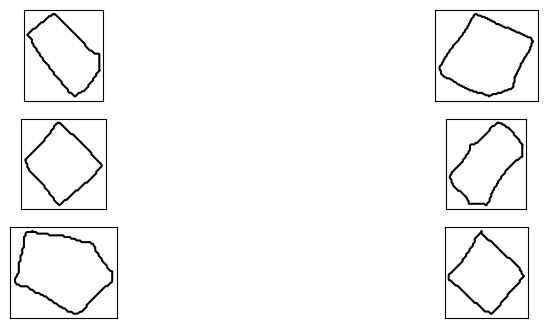

In [109]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ind = np.random.choice(polys_clean[polys_clean['predicted type']=='rectangular'].index)
    poly = polys_clean.loc[ind, 'geometry']
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color='k')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

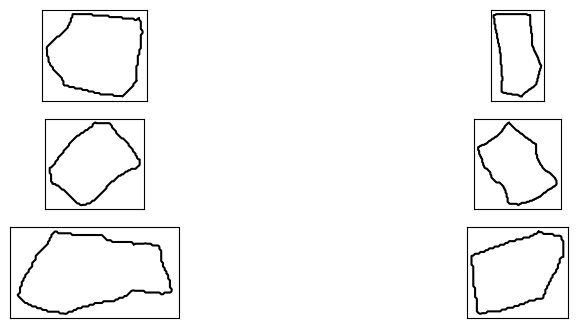

In [110]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ind = np.random.choice(polys_clean[polys_clean['predicted type']=='normal'].index)
    poly = polys_clean.loc[ind, 'geometry']
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color='k')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

100%|██████████| 14280/14280 [01:32<00:00, 154.08it/s]


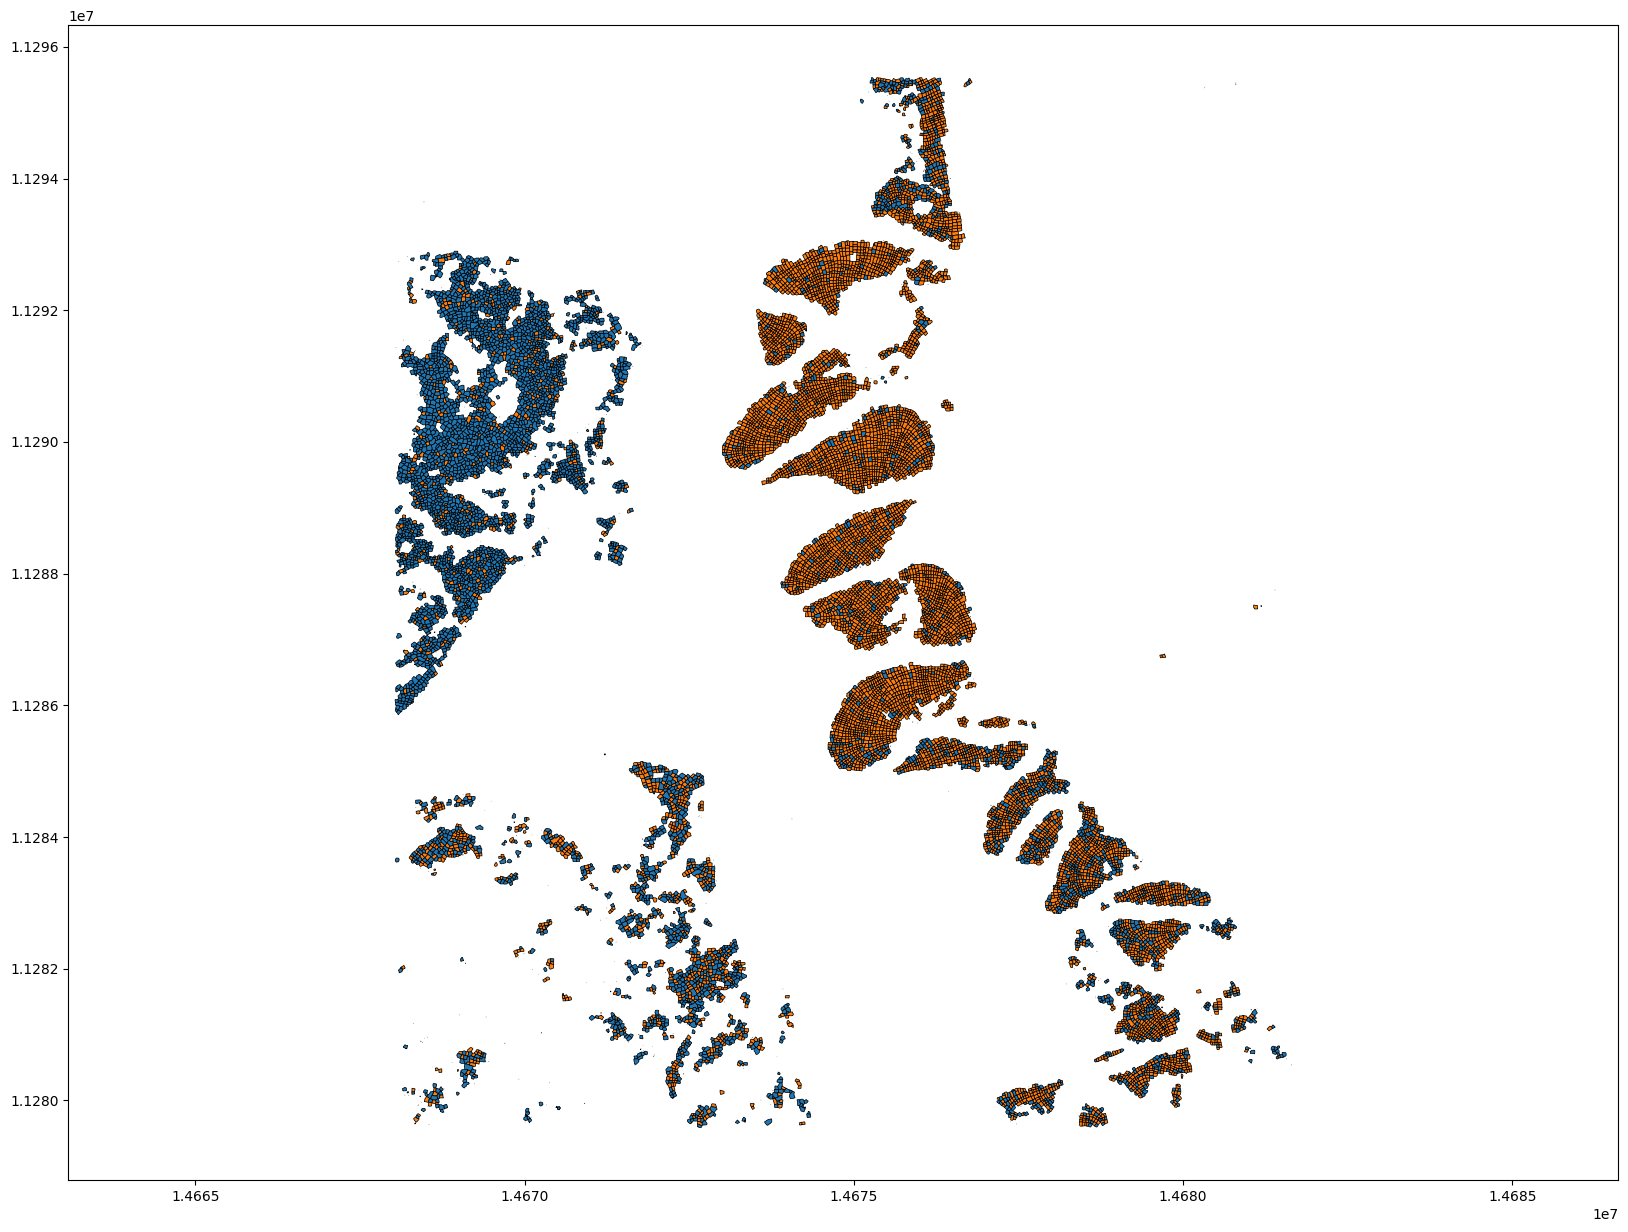

In [111]:
# plot the classification result for all the polygons
from tqdm import trange
plt.figure(figsize=(20, 15))
for i in trange(len(polys_clean)):
    x = polys_clean['geometry'].iloc[i].exterior.xy[0]
    y = polys_clean['geometry'].iloc[i].exterior.xy[1]
    if polys_clean['predicted type'].iloc[i] == 'normal':
        plt.fill(x, y, '#1f77b4', edgecolor='k', linewidth=0.5)
    else:
        plt.fill(x, y, '#ff7f0e', edgecolor='k', linewidth=0.5)
plt.axis('equal');

# Task 1

**(a)** For the ice-wedge polygon classification problem, we got an accuracy of ~65%. Your task is to improve the accuracy as much as possible. We only had three features (area, number of vertices, and aspect ratio) doing the training and the prediction. It is likely that adding new features will improve the model. These new features need to be potentially useful when it comes to telling whether a polygon is rectangular or not. One obvious set of features is the distribution of angles in a polygon. (Note however that the average angle is essentially the same feature as the number of vertices.)

**(b)** Using all the features, build a decision tree classifier and restrict the depth to a small number (not larger than four). Train it and then use the 'graphviz' module to plot the tree.

**(c)** Compute the feature importances and make a bar graph showing which are the most important ones.

In [112]:
# Create a function to generate angle features, min angle, max angle, std angle, interior sum

def calculate_min_angle(polygon):
    # Extract coordinates, closing the loop by adding the first point to the end
    coords = list(polygon.exterior.coords)
    if len(coords) < 4: return None # Needs at least 3 points + 1 for closing

    angles = []
    for i in range(len(coords) - 1):
        # Three consecutive points for angle (p1-p2-p3)
        p1 = np.array(coords[i-1])
        p2 = np.array(coords[i])
        p3 = np.array(coords[(i+1) % (len(coords)-1)])

        # Vectors
        v1 = p1 - p2
        v2 = p3 - p2

        # Angle using arctan2
        angle = np.arctan2(np.linalg.det([v1,v2]), np.dot(v1,v2))
        angles.append(abs(np.degrees(angle)))

    angle_min = np.min(angles)
    angle_max = np.max(angles)
    angle_sum = np.sum(angles)
    angle_std = np.std(angles)

    return angle_min, angle_max, angle_sum, angle_std

In [113]:
list_angle_min = []
list_angle_max = []
list_angle_sum = []
list_angle_std = []

for i in range(0,len(polys_training)):
  angle_tuple = calculate_min_angle(polys_training['geometry'].iloc[i])
  list_angle_min.append(angle_tuple[0])
  list_angle_max.append(angle_tuple[1])
  list_angle_sum.append(angle_tuple[2])
  list_angle_std.append(angle_tuple[3])

polys_training['angle_min'] = list_angle_min
polys_training['angle_max'] = list_angle_max
polys_training['angle_sum'] = list_angle_sum
polys_training['angle_std'] = list_angle_std

In [114]:
polys_training['compactness'] = (4* np.pi * polys_training['geometry'].iloc[:].area)/polys_training['geometry'].iloc[:].length**2


polys_training['perimeter'] = polys_training['geometry'].iloc[:].length

In [127]:
import math

def centroid_dist(polygon):
    coords = list(polygon.exterior.coords)
    centroid = polygon.centroid
    c_point = (centroid.x, centroid.y)
    if len(coords) < 4: return None # Needs at least 3 points + 1 for closing

    dists = []
    for i in range(len(coords)):
      dist = math.dist(c_point, coords[i])
      dists.append(dist)

    min_dist = np.min(dists)
    max_dist = np.max(dists)
    return min_dist, max_dist



In [128]:
centroid = polys_training['geometry'].iloc[0].centroid
centroid.coords

In [129]:
list_cent_dist_min = []
list_cent_dist_max = []

for i in range(0,len(polys_training)):
  cent_dist_tuple = centroid_dist(polys_training['geometry'].iloc[i])
  list_cent_dist_min.append(cent_dist_tuple[0])
  list_cent_dist_max.append(cent_dist_tuple[1])

polys_training['cent_dist_min'] = list_cent_dist_min
polys_training['cent_dist_max'] = list_cent_dist_max


In [130]:

x = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Encode string labels to numeric values for XGBoost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)



In [134]:
feature_list = x.columns

Index(['area', 'n_vertices', 'aspect ratio', 'angle_min', 'angle_max',
       'angle_sum', 'angle_std', 'compactness', 'perimeter', 'cent_dist_min',
       'cent_dist_max'],
      dtype='object')

In [131]:


# Train the model
rf.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7344461305007587


PART B

In [ ]:
estimator = rf.estimators_[0]

from sklearn.tree import export_graphviz

# Export as dot file
dot_data = export_graphviz(
    estimator,
    out_file=None, # Set to a filename (e.g., 'tree.dot') to save to a file
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    precision=2,
    special_characters=True
)

import graphviz

# Create a Graphviz source object from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph (works well in Jupyter Notebook/Lab)
graphn

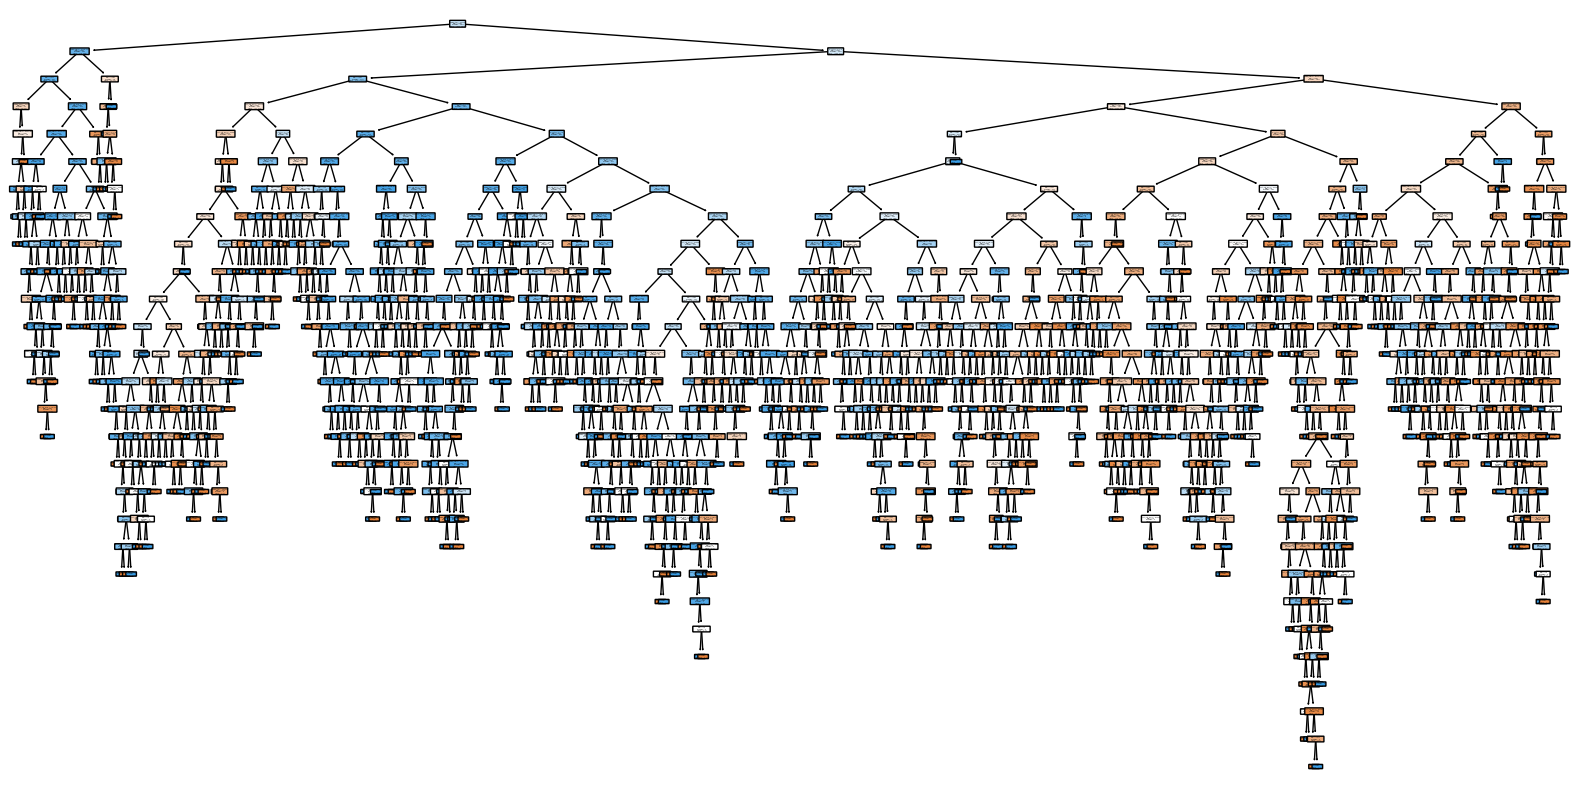

In [135]:
from sklearn import tree

# Select that specific tree
single_tree = rf.estimators_[0]

# Plot it
tree.plot_tree(single_tree,
               feature_names=feature_list,
               filled=True,
               rounded=True)

PART C

In [138]:
score_list = []
for name, score in zip(feature_list, rf.feature_importances_):
    print("{:12s}".format(name), "{:10.3f}".format(score))
    score_list.append(score)

area              0.102
n_vertices        0.130
aspect ratio      0.101
angle_min         0.000
angle_max         0.001
angle_sum         0.121
angle_std         0.109
compactness       0.117
perimeter         0.106
cent_dist_min      0.102
cent_dist_max      0.111


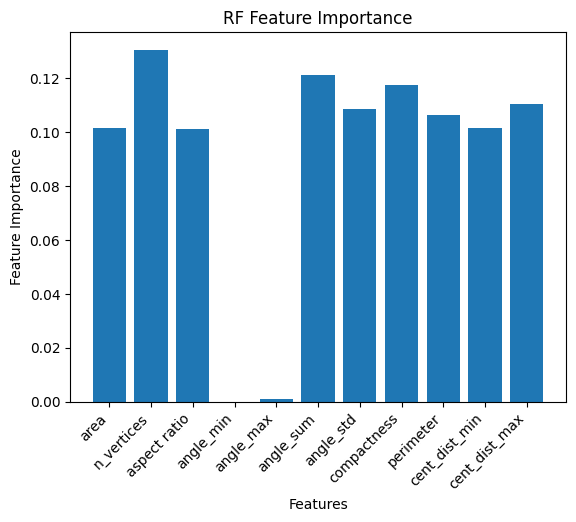

In [141]:
# Create the bar chart
plt.bar(feature_list, score_list)

# Add labels and a title for clarity
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('RF Feature Importance')

# Display the chart
plt.xticks(rotation=45, ha='right') # Rotate by 45 degrees and align right
plt.show()

# Task 2

For this task, we are going to focus on a classification problem that is more straightforward in terms of defining the features.

We have an image that was collected from an ultramafic rock that contains a lot of the mineral olivine, in addition to smaller amounts of other minerals (image courtesy of Dr. Estibalitz Ukar, UT Austin). The goal is to determine the composition of this rock, that is, what area fraction in the image is occupied by each mineral. Different minerals have different colors in the image; however, if you zoom in, you can see that at the pixel level the image is quite noisy, and there is no single color or pixel value that corresponds to a mineral, so we need to figure out a way to classify every pixel into a number of classes that correspond to the minerals. Your task is to create training data, build and train a random forest classifier, and derive the fraction of each mineral in the image.

This pixel-based segmentation workflow can be applied to any image-like dataset where you have multiple channels, e.g., detecting different classes in remote sensing data.

What follows is some background information on the minerals and their colors, and code for creating training data.

In [ ]:
import rasterio
from rasterio.features import rasterize
from PIL import Image
from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
from shapely.geometry import Polygon
from matplotlib.patches import PathPatch
import geopandas as gpd

#Other packages added
import numpy as np
import pandas as pd

In [ ]:
# download image
!wget https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ultramafic_rock.png

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread('ultramafic_rock.png')
plt.figure(figsize=(10,10))
plt.imshow(image);

1 . Use the [Polygonzone](https://polygonzone.roboflow.com/) online tool to digitize polygons for each class.

These are the minerals and their colors in the image:

1. Teal: olivine
2. Blue: clinopyroxene
3. Dark blue (slight difference with Cpx): orthopyroxene
4. Lime green: chromium spinel
5. Yellow (very little): nickel sulfide
6. Pink (very little): magnetite
7. Light blue (very little): apatite
8. Black: holes

It is a bit tricky to get good polygons for small crystals, so feel free to ignore the classes where it says "very little".

2. Once you have collected a few polygons for a class, copy and paste their coordinates into a list; then convert the arrays to shapely polygons:

In [ ]:
olv = [
    np.array([[867, 493], [930, 380], [1057, 373], [981, 512], [898, 525], [898, 525], [879, 500], [879, 500]]),
    np.array([[2012, 1417], [1923, 1512], [1835, 1468], [1898, 1373], [2012, 1392], [2012, 1392]]),
    np.array([[569, 797], [538, 791], [563, 677], [620, 677], [664, 791], [595, 822]]),
    np.array([[1145, 734], [1151, 620], [1215, 620], [1189, 715]]),
    np.array([[2044, 2986], [2100, 2885], [2157, 2898], [2075, 3024]])
]

olv_list = ['olv','olv','olv','olv','olv']

olv_poly = [Polygon(arr) for arr in olv]


cpx = [
    np.array([[2298, 1103], [2344, 1140], [2377, 1242], [2321, 1256], [2284, 1200], [2302, 1121]]),
    np.array([[3230, 1205], [3444, 1294], [3388, 1345], [3234, 1284], [3239, 1233]]),
    np.array([[1990, 2109], [2041, 2165], [2055, 2240], [2004, 2244], [1930, 2146]]),
    np.array([[271, 1168], [354, 1168], [382, 1228], [340, 1247], [285, 1182]]),
    np.array([[2754, 3297], [2848, 3307], [2866, 3284], [2787, 3270], [2759, 3288]])]

cpx_list = ['cpx','cpx','cpx','cpx','cpx']

cpx_poly = [Polygon(arr) for arr in cpx]

opx = [
    np.array([[2467, 1057], [2493, 1050], [2499, 905], [2562, 886], [2594, 949], [2619, 974], [2556, 1050]]),
    np.array([[1049, 3260], [1109, 3251], [1072, 3279], [1012, 3265], [1016, 3251]]),
    np.array([[2922, 3447], [2922, 3423], [2964, 3456]]),
    np.array([[2377, 3284], [2405, 3232], [2433, 3237], [2391, 3288]]),
    np.array([[1231, 958], [1245, 921], [1268, 925], [1254, 958]])
]

opx_list = ['opx','opx','opx','opx','opx']

opx_poly = [Polygon(arr) for arr in opx]

chr = [
    np.array([[2561, 294], [2598, 205], [2659, 219], [2635, 275]]),
    np.array([[2677, 107], [2705, 56], [2766, 107], [2766, 126], [2710, 121]]),
    np.array([[2443, 168], [2494, 162], [2526, 175], [2481, 194]]),
    np.array([[1855, 1832], [1823, 1826], [1830, 1782], [1855, 1807]])
]

chr_list = ['chr','chr','chr','chr']

chr_poly = [Polygon(arr) for arr in chr]


blk = [
    np.array([[2847, 468], [2891, 367], [2948, 399], [2936, 487]]),
    np.array([[3208, 247], [3328, 146], [3328, 202]]),
    np.array([[1828, 2771], [1809, 2657], [1930, 2664]]),
    np.array([[848, 2771], [797, 2739], [841, 2689]]),
    np.array([[1107, 171], [1076, 89], [1145, 101], [1145, 146]])
]

blk_list = ['blk','blk','blk','blk','blk']

blk_poly = [Polygon(arr) for arr in blk]

3. Rasterize the polygons so that the pixels in each polygon are different from the rest of the image. I am providing the function to do this below.

In [ ]:
def rasterize_polygons(polygons, image, class_label):
    """
    Rasterizes a list of polygons onto an image-like array.

    Args:
        polygons (list): A list of polygons.
        image (numpy.ndarray): The input image.
        class_label: The class label you want to use (integer).

    Returns:
        numpy.ndarray: The rasterized array.

    """
    labels = class_label*np.ones((len(polygons),))
    # Combine polygons and labels into a tuple of (polygon, label) pairs
    shapes_with_labels = zip(polygons, labels)
    # Define the shape and resolution of the rasterized output
    out_shape = image.shape[:2]  # Output array shape (height, width)
    bounds = (0, image.shape[0], image.shape[1], 0)  # Left, bottom, right, top of the array (bounding box)
    # Define the transformation from pixel coordinates to spatial coordinates
    transform = rasterio.transform.from_bounds(*bounds, out_shape[1], out_shape[0])
    # Rasterize the polygons into an array of labels
    rasterized = rasterize(
        ((poly, label) for poly, label in shapes_with_labels),
        out_shape=out_shape,
        transform=transform,
        fill=0,  # Background value (for pixels outside polygons)
        dtype='int32'
    )
    return rasterized

In [ ]:
#olv
class_label = 1
raster1 = rasterize_polygons(olv_poly, np.array(image), class_label)
#cpx
class_label = 2
raster2 = rasterize_polygons(cpx_poly, np.array(image), class_label)
#opx
class_label = 3
raster3 = rasterize_polygons(opx_poly, np.array(image), class_label)
#chr
class_label = 4
raster4 = rasterize_polygons(chr_poly, np.array(image), class_label)
#blk
class_label = 8
raster8 = rasterize_polygons(blk_poly, np.array(image), class_label)


In [ ]:
plt.figure()
plt.imshow(raster1);

4. Create a mask called 'labels' and assign the class label to the pixels that belong to the current class:

In [ ]:
# only run this once to initialize the 'labels' array!

labels = np.zeros((image.shape[0], image.shape[1]))

In [ ]:
labels[raster1 == 1] = 1 # add new polygons to 'labels'
labels[raster2 == 2] = 2 # add new polygons to 'labels'
labels[raster3 == 3] = 3 # add new polygons to 'labels'
labels[raster4 == 4] = 4 # add new polygons to 'labels'
labels[raster8 == 8] = 8 # add new polygons to 'labels'

In [ ]:
plt.figure()
plt.imshow(labels);

5. Go through the polygon picking and rasterization for each class. At the end of the process, you should have a 'labels' array that has a background with values of 0, and values of 1 for class 1, values of 2 for class 2, and so on. Now your goal is to take all the R, G, B values for the nonzero pixels in 'labels' and sort them into a dataframe with columns 'R', 'G', 'B', and 'label'.

In [ ]:
labels.shape

In [ ]:
image.shape

In [ ]:
# Make 2D arrays 1D arrays
labels_flat = labels.flatten()
red_flat = image[:,:,0].flatten()
green_flat = image[:,:,1].flatten()
blue_flat = image[:,:,2].flatten()

# Assemble 1D arrays into pandas df
rgb_df = pd.DataFrame()
rgb_df['labels'] = labels_flat
rgb_df['red'] = red_flat
rgb_df['green'] = green_flat
rgb_df['blue'] = blue_flat

6. Once you have the dataframe, you can proceed to training a random forest classifier, with the features being R, G, and B, and the target being the 'label' column. Obviously, you should be aiming for a high accuracy; if there is significant confusion between some of the classes, you might want to rethink and repick the polygons.

In [ ]:
rgb_df_labeled = rgb_df[rgb_df['labels'] > 0]

In [ ]:
from sklearn.model_selection import train_test_split


X = rgb_df_labeled.drop('labels', axis=1) # Features
y = rgb_df_labeled['labels']             # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
'''
We reduced the number of n_estimators from 1000 to 100 and decimated the training/testing
and saw only a modest decrease in accuracy, but a very large improvement in
computational costs.
'''

# Train the model
rf.fit(X_train[::10], y_train[::10])

# Make predictions on the test set
y_pred = rf.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

7. Make the predictions for the whole image and plot the image so that every class is plotted with the mean R, G, B values from the training data (so that the prediction looks very similar to the original image).

In [ ]:
X_infer = rgb_df.drop('labels', axis=1) # Features

y_pred_all = rf.predict(X_infer)


In [ ]:
pred_all = y_pred_all.reshape(labels.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(pred_all)

In [ ]:
plt.imshow(image)

8. Finally, compute the fraction of area occupied by each class in the image and report it for each mineral.

In [ ]:
class1_frac_area = len(y_pred_all[y_pred_all == 1])/len(y_pred_all)
class2_frac_area = len(y_pred_all[y_pred_all == 2])/len(y_pred_all)
class3_frac_area = len(y_pred_all[y_pred_all == 3])/len(y_pred_all)
class4_frac_area = len(y_pred_all[y_pred_all == 4])/len(y_pred_all)
class8_frac_area = len(y_pred_all[y_pred_all == 8])/len(y_pred_all)

print(class1_frac_area)
print(class2_frac_area)
print(class3_frac_area)
print(class4_frac_area)
print(class8_frac_area)
